In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import glob
import math
warnings.filterwarnings('ignore')

In [81]:
def preprocessing(input_path):
    all_input_list = sorted(glob.glob(input_path))
    train = pd.DataFrame()
    for datapath in all_input_list:
        data = pd.read_csv(datapath) 
        
        #  obs_time 단위 통일
        data['obs_time'] = data.index % 24 
        
        # 전처리 1 : 데이콘에서 제공된 제한범위로 1차 전처리
        df = abs(data)
        df.loc[(df['내부온도관측치'] > 40), '내부온도관측치'] = 40
        df.loc[(df['내부습도관측치'] > 100), '내부습도관측치'] = 100
        df.loc[(df['co2관측치'] > 1200), 'co2관측치'] = 1200
        df.loc[(df['ec관측치'] > 8), 'ec관측치'] = 8
        df.loc[(df['시간당분무량'] > 3000), '시간당분무량'] = 3000
        df.loc[(df['시간당백색광량'] > 120000), '시간당백색광량'] = 120000
        df.loc[(df['시간당적색광량'] > 120000), '시간당적색광량'] = 120000
        df.loc[(df['시간당청색광량'] > 120000), '시간당청색광량'] = 120000
        df.loc[(df['시간당총광량'] > 120000), '시간당총광량'] = 120000
        
        # 전처리 2 : 이상치처리
        # 해당경우는 14시에서 15시로 넘어갈때 내부온도 및 내부습도가 0으로 관찰되었음
        # 같은 케이스가 반복적으로 보여서 15시 값을 14시 값으로 바꿔줌
        df.loc[(df['내부온도관측치'] < 6.921053), '내부온도관측치'] = 6.921053
        df.loc[(df['내부습도관측치'] < 9.639473), '내부습도관측치'] = 9.639473
        
        # 전처리3 : 시간당총광량
        # 백색/적색/청색 값의 합이 총광량이기때문에 전처리 1에 영향을 받았을 가능성이 있어서 칼럼을 다시 만들어줌
        df['시간당총광량'] = df['시간당청색광량']+df['시간당백색광량']+df['시간당적색광량']
        
        # 전처리4 : 전처리 과정으로 인해 누적값 새로 만들어줌
        col_list = df.columns
        for i in range(0,len(col_list)):
            col = col_list[i]    
            if '누적' in col : 
                df[col] = df.groupby((df.obs_time == 0).cumsum()).agg(col_list[i-1]).cumsum()   
        
        # 전처리 5 : expanding        
        # case 별 0~27 days 까지의 누적값 칼럼 추가
            df['일간누적분무량합'] = df['시간당분무량'].cumsum().values
            df['일간누적백색광량합'] = df['시간당백색광량'].cumsum().values
            df['일간누적적색광량합'] = df['시간당적색광량'].cumsum().values
            df['일간누적청색광량합'] = df['시간당청색광량'].cumsum().values
            df['일간누적총광량합'] = df['시간당총광량'].cumsum().values    
                
            df.to_csv(datapath,index=False)
            train = pd.concat([train,df])
    print('finish!!')
    return train

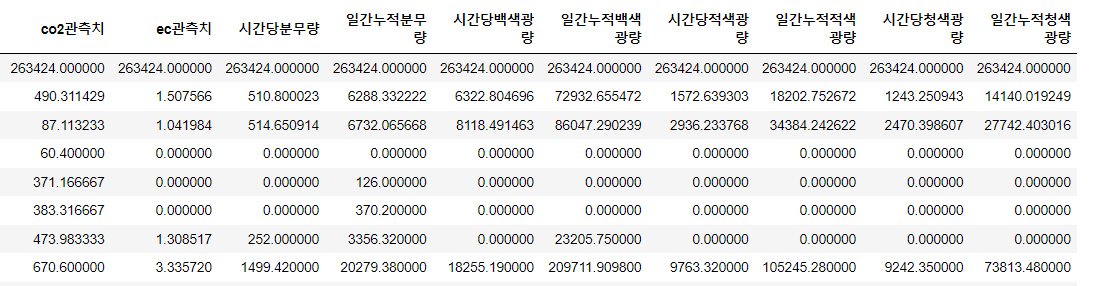

In [82]:
def preprocessing(input_path):
    all_input_list = sorted(glob.glob(input_path))
    train = pd.DataFrame()
    for datapath in all_input_list:
        data = pd.read_csv(datapath) 
        
        #  obs_time 단위 통일
        data['obs_time'] = data.index % 24 
        
        # 전처리 1 : 데이콘에서 제공된 제한범위로 1차 전처리
        # 분무량,백색광량,적색광량,청색광량 95% 값으로 제한
        df = abs(data)
        df.loc[(df['내부온도관측치'] > 40), '내부온도관측치'] = 40
        df.loc[(df['내부습도관측치'] > 100), '내부습도관측치'] = 100
        df.loc[(df['co2관측치'] > 1200), 'co2관측치'] = 1200
        df.loc[(df['ec관측치'] > 8), 'ec관측치'] = 8
        df.loc[(df['시간당분무량'] > 1499.42), '시간당분무량'] = 1499.42
        df.loc[(df['시간당백색광량'] > 18255.19), '시간당백색광량'] = 18255.19
        df.loc[(df['시간당적색광량'] > 9763.32), '시간당적색광량'] = 9763.32
        df.loc[(df['시간당청색광량'] > 9242.35), '시간당청색광량'] = 9242.35
        df.loc[(df['시간당총광량'] > 120000), '시간당총광량'] = 120000
        
        # 전처리 2 : 이상치처리
        # 해당경우는 14시에서 15시로 넘어갈때 내부온도 및 내부습도가 0으로 관찰되었음
        # 같은 케이스가 반복적으로 보여서 15시 값을 14시 값으로 바꿔줌
        df.loc[(df['내부온도관측치'] < 6.921053), '내부온도관측치'] = 6.921053
        df.loc[(df['내부습도관측치'] < 9.639473), '내부습도관측치'] = 9.639473
        
        # 전처리3 : 시간당총광량
        # 백색/적색/청색 값의 합이 총광량이기때문에 전처리 1에 영향을 받았을 가능성이 있어서 칼럼을 다시 만들어줌
        df['시간당총광량'] = df['시간당청색광량']+df['시간당백색광량']+df['시간당적색광량']
        
        # 전처리4 : 전처리 과정으로 인해 누적값 새로 만들어줌
        col_list = df.columns
        for i in range(0,len(col_list)):
            col = col_list[i]    
            if '누적' in col : 
                df[col] = df.groupby((df.obs_time == 0).cumsum()).agg(col_list[i-1]).cumsum()    
                
            df.to_csv(datapath,index=False)
            train = pd.concat([train,df])
    print('finish!!')
    return train

In [83]:
traininput = preprocessing('train_input/*.csv')

finish!!


In [84]:
testinput = preprocessing('test_input/*.csv')

finish!!


In [68]:
traininput.describe()

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
count,301056.000000,301056.000000,301056.000000,301056.000000,301056.000000,301056.000000,301056.000000,301056.000000,301056.000000,301056.000000,301056.000000,301056.00000,301056.000000,301056.000000,301056.000000,301056.000000
mean,13.500000,11.500000,26.027711,63.935603,497.946074,1.507566,510.800023,6278.634165,6322.804696,72937.698920,1572.639303,18203.39144,1243.250943,14141.374971,9138.694943,105255.843280
std,8.077761,6.922198,3.945389,11.655016,113.889362,1.041984,514.650792,6710.262519,8118.489537,86049.286289,2936.233072,34383.64141,2470.398021,27742.169413,9086.495567,97396.749967
min,0.000000,0.000000,6.921053,9.639473,60.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,5.750000,23.971250,57.494583,420.245833,0.929581,0.000000,1234.280000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7280.962850
50%,13.500000,11.500000,26.291667,62.118333,473.983333,1.308517,252.000000,3356.320000,0.000000,23205.750000,0.000000,0.00000,0.000000,0.000000,9242.350000,92172.360000
75%,20.250000,17.250000,28.106667,73.157166,551.105952,2.291322,769.000000,9984.140000,18236.625400,145422.700000,1495.939200,17529.29640,1306.461000,18547.360000,18255.190000,177496.140600
max,27.000000,23.000000,40.000000,93.350002,1200.000000,5.462324,1499.420000,42855.230000,18255.190000,292014.969800,9763.320000,200561.76000,9242.350000,190016.450000,37260.860000,559488.881000


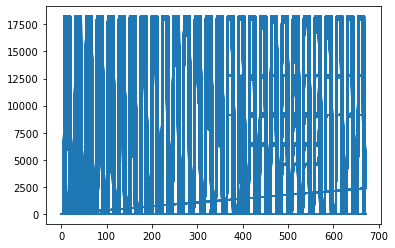

In [69]:
plt.plot(traininput['시간당백색광량'])

In [71]:
colname=traininput.columns
colname

Index(['DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
       '일간누적분무량', '시간당백색광량', '일간누적백색광량', '시간당적색광량', '일간누적적색광량', '시간당청색광량',
       '일간누적청색광량', '시간당총광량', '일간누적총광량'],
      dtype='object')

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainsd = scaler.fit(traininput.iloc[:,2:]).transform(traininput.iloc[:,2:])
testsd = scaler.fit(traininput.iloc[:,2:]).transform(testinput.iloc[:,2:])

trainsd = pd.DataFrame(trainsd,columns=colname[2:]).reset_index(drop=True)
testsd = pd.DataFrame(testsd,columns=colname[2:]).reset_index(drop=True)

train=pd.merge(traininput.iloc[:,:2].reset_index(drop=True),trainsd,left_index=True, right_index=True)
test=pd.merge(testinput.iloc[:,:2].reset_index(drop=True),testsd,left_index=True, right_index=True)

In [74]:
def preprocessing2(input_path, data):
    all_input_list = sorted(glob.glob(input_path))
    for i in range(0,len(all_input_list)):
        df = data.iloc[ 24*28*i : 24*28*(i+1)]
        df.to_csv(all_input_list[i],index=False)
    print("완료~!")

In [85]:
preprocessing2('train_input/*.csv',traininput)

완료~!


In [86]:
preprocessing2('test_input/*.csv',testinput)

완료~!


In [ ]:
def make_dataset(input_path, target_path):
    train = pd.DataFrame()
    all_input_list = sorted(glob.glob(input_path))
    all_target_list = sorted(glob.glob(target_path))
    for x, y in zip(all_input_list,all_target_list):
        x = pd.read_csv(x)
        y = pd.read_csv(y)
        x = x.iloc[:,1:]
        col_list = x.columns[1:]
        for i in range(0,28) :
            day = x.iloc[24*i:24*i+24]

            time_list = day['obs_time'].unique()
            for col in col_list :

                    for t in range(0,int(len(time_list)/3)) :
                        time = time_list[t*3]
                        ntime = time_list[t*3+1]
                        nntime = time_list[t*3+2]
                        value1 = day[day['obs_time']==time][col].iloc[0]
                        value2 = day[day['obs_time']==ntime][col].iloc[0]
                        value3 = day[day['obs_time']==nntime][col].iloc[0]
                        x[col+str(time)+str("+")+str(nntime)] = (value1 + value2 + value3 )/3 # 3시간단위 평균

            nx = x.iloc[:1,15:]
            ny = y.iloc[i:i+1].reset_index(drop=True)
            xy = pd.merge(nx,ny,left_index=True, right_index=True)
            train = pd.concat([train,xy]).reset_index(drop=True)

    return train

In [107]:
def make_dataset(input_path, target_path):
    train = pd.DataFrame()
    all_input_list = sorted(glob.glob(input_path))
    all_target_list = sorted(glob.glob(target_path))
    for x, y in zip(all_input_list,all_target_list):
        x = pd.read_csv(x)
        y = pd.read_csv(y)
        x = x.iloc[:,1:]
        x = x.drop(['시간당총광량'],axis=1)
        col_list = x.columns[1:]
        for i in range(0,28) :
            day = x.iloc[24*i:24*i+24]

            time_list = day['obs_time'].unique()
            for col in col_list :
                if col in ['일간누적백색광량','일간누적청색광량','일간누적적색광량','일간누적분무량','일간누적총광량']:
                    for t in range(11,len(time_list)):
                        time = time_list[t]
                        value1 = day[day['obs_time']==time][col].iloc[0]
                        x[col+str(time)] = value1
                else :
                    for t in range(0,int(len(time_list)/3)) :
                        time = time_list[t*3]
                        ntime = time_list[t*3+1]
                        nntime = time_list[t*3+2]
                        value1 = day[day['obs_time']==time][col].iloc[0]
                        value2 = day[day['obs_time']==ntime][col].iloc[0]
                        value3 = day[day['obs_time']==nntime][col].iloc[0]
                        x[col+str(time)+str("+")+str(nntime)] = (value1 + value2 + value3 )*(i+1) /3 # 3시간단위 평균

            nx = x.iloc[:1,15:]
            ny = y.iloc[i:i+1].reset_index(drop=True)
            xy = pd.merge(nx,ny,left_index=True, right_index=True)
            train = pd.concat([train,xy]).reset_index(drop=True)

    return train

In [108]:
train_input_path, train_target_path = 'train_input/*.csv', 'train_target/*.csv'
test_input_path, test_target_path = 'test_input/*.csv', 'test_target/*.csv'

train = make_dataset(train_input_path, train_target_path)
test = make_dataset(test_input_path, test_target_path)

In [109]:
train.to_csv('train_3시간평균_weight.csv',index=False)
test.to_csv('test_3시간평균_weight.csv',index=False)

In [105]:
train

,내부온도관측치3+5,내부온도관측치6+8,내부온도관측치9+11,내부온도관측치12+14,내부온도관측치15+17,내부온도관측치18+20,내부온도관측치21+23,내부습도관측치0+2,내부습도관측치3+5,내부습도관측치6+8,...,일간누적총광량16,일간누적총광량17,일간누적총광량18,일간누적총광량19,일간누적총광량20,일간누적총광량21,일간누적총광량22,일간누적총광량23,DAT,predicted_weight_g
0,25.373889,26.841667,27.573333,28.036111,28.649444,28.310000,26.043333,81.523651,81.462778,75.973889,...,210911.3740,230142.8960,249374.4180,268605.9400,269376.2938,269376.2938,269376.2938,269376.2938,1,0.167719
1,25.438333,27.631667,28.372222,28.804444,29.202778,28.716111,26.386111,81.487548,81.880000,76.343889,...,211220.7840,230452.3060,249683.8280,268915.3500,270032.8895,270032.8895,270032.8895,270032.8895,2,0.181787
2,25.685556,27.895000,27.160556,26.575556,26.802778,27.525556,25.686111,81.430941,81.408333,75.892222,...,210727.0981,229958.6201,249190.1421,268421.6641,269399.5381,269399.5381,269399.5381,269399.5381,3,0.265921
3,25.243889,27.001667,26.408220,26.550556,26.287222,27.003333,25.249444,80.844284,80.972222,75.385556,...,211220.7840,230452.3060,249683.8280,268915.3500,270032.8895,270032.8895,270032.8895,270032.8895,4,0.423650
4,25.401111,26.632222,27.135555,27.560556,27.477778,27.258333,25.272778,81.380424,81.638333,76.016112,...,210838.9167,230070.4387,249301.9607,268533.4827,269511.3567,269511.3567,269511.3567,269511.3567,5,0.475272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27.275000,27.220000,28.542778,28.590000,27.455000,26.251667,25.355000,80.151667,80.093333,79.498611,...,94625.6875,104128.5225,111283.0298,113682.8983,113682.8983,113682.8983,113682.8983,113682.8983,24,64.875499
780,24.735555,24.566111,25.751444,26.000555,27.487222,27.359444,24.531111,80.157222,80.449445,80.419890,...,94590.2532,104093.0882,111265.2685,113697.3500,113697.3500,113697.3500,113697.3500,113697.3500,25,74.002614
781,22.966667,25.825000,27.424444,27.465000,27.435556,26.120555,25.815000,78.965556,78.947778,77.786111,...,94519.3846,104022.2196,111221.8251,113644.2427,113644.2427,113644.2427,113644.2427,113644.2427,26,76.342275
782,22.966667,25.825000,27.424444,27.465000,27.435556,26.120555,25.815000,78.617778,78.947778,77.786111,...,94519.3846,104022.2196,111221.8251,113644.2427,113644.2427,113644.2427,113644.2427,113644.2427,27,82.621245
